In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset1 = '../data/AirVisual Data Dump.csv'
datasetAirPort = '../data/airportdata.csv'

In [3]:
data = pd.read_csv(dataset1)
dataPort = pd.read_csv(datasetAirPort)

In [4]:
data["City"].fillna("Karachi", inplace = True)

In [5]:
data.Datetime = pd.to_datetime(data['Datetime'])
data['weekday'] = data['Datetime'].dt.dayofweek
data['weekdayName'] = data.Datetime.dt.day_name()
data['hour'] = data.Datetime.dt.hour
data['month'] = data.Datetime.dt.month
data['year'] = data.Datetime.dt.year
data['dayofmonth'] = data.Datetime.dt.day

In [6]:
dataP = dataPort.drop(['gust_mph', 'peak_wind_gust_mph'], axis = 1)

In [7]:
dataP['datetime'] = pd.to_datetime(dataP.valid)
dataP['datetime'] = dataP['datetime'].dt.round('H')

In [8]:
# OPFA Faisalabad
# OPKC Karachi
# OPLA Lahore
# OPPS Peshawar
# OPRN Islamabad
serialToCity = {'OPFA': 'Faisalabad', 'OPKC': 'Karachi', 'OPLA': 'Lahore', 'OPPS': 'Peshawar', 'OPRN': 'Islamabad'}

In [9]:
dataP['City'] = dataP.station.apply(lambda x : serialToCity[x])
dataA = dataP.drop(['valid','station', 'lon', 'lat'], axis = 1)
dataAmean = dataA.groupby(['City', 'datetime']).mean()

In [10]:
dfmerged = data.merge( dataAmean, how = 'left', left_on = ['Datetime', 'City'], right_on = ['datetime', 'City'])

In [11]:
df = dfmerged.drop(['longitude', 'latitude'], axis = 1)
df.corr('pearson')

,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
PM2.5,1.000000,0.981972,0.028740,-0.082070,0.062484,0.029526,0.016961,-0.003523,-0.027700,0.029919,0.077552,0.028662,-0.052282,0.015523,-0.039781,-0.049509,-0.147652
USAQI,0.981972,1.000000,0.033964,-0.111019,0.036400,0.072865,0.068662,-0.003716,-0.027461,0.015564,0.091346,0.025104,-0.079506,-0.008107,-0.071768,-0.078174,-0.202553
CO2,0.028740,0.033964,1.000000,-0.173334,-0.167704,0.063214,0.080631,-0.009809,0.042070,-0.005703,-0.140071,0.009270,-0.198874,0.008818,-0.127681,-0.145267,-0.126561
Temperature,-0.082070,-0.111019,-0.173334,1.000000,-0.065059,-0.315053,-0.347478,-0.000261,0.174570,0.196425,0.147730,0.008703,0.744362,-0.075547,0.254280,0.342160,0.277008
RelativeHumidity,0.062484,0.036400,-0.167704,-0.065059,1.000000,-0.282022,-0.362638,-0.009743,-0.142643,0.213105,0.130954,-0.015409,0.169734,0.612875,0.158143,0.136961,-0.082310
Outdoor PM2.5,0.029526,0.072865,0.063214,-0.315053,-0.282022,1.000000,0.937875,0.002019,-0.068443,-0.036980,-0.322479,-0.029605,-0.323867,-0.215789,-0.273062,-0.202675,-0.220832
OutdoorUSAQI,0.016961,0.068662,0.080631,-0.347478,-0.362638,0.937875,1.000000,-0.006308,-0.051618,-0.072605,-0.385460,-0.019142,-0.366617,-0.270268,-0.328373,-0.237670,-0.247635
weekday,-0.003523,-0.003716,-0.009809,-0.000261,-0.009743,0.002019,-0.006308,1.000000,-0.001271,0.004777,-0.003999,-0.007662,0.001442,-0.010398,0.007523,-0.008554,0.018850
hour,-0.027700,-0.027461,0.042070,0.174570,-0.142643,-0.068443,-0.051618,-0.001271,1.000000,-0.001491,0.001458,-0.001141,-0.072650,0.101517,0.039589,-0.018483,0.122579
month,0.029919,0.015564,-0.005703,0.196425,0.213105,-0.036980,-0.072605,0.004777,-0.001491,1.000000,-0.323392,-0.041651,0.152660,0.149167,-0.078198,0.014370,-0.112653


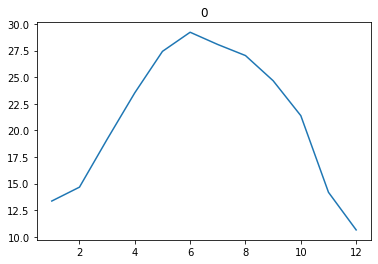

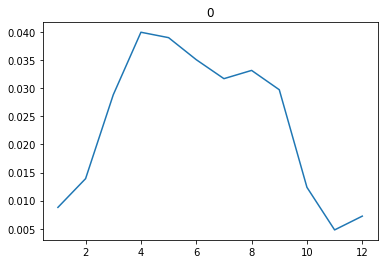

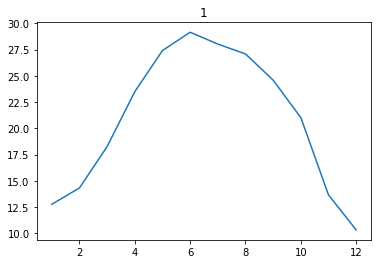

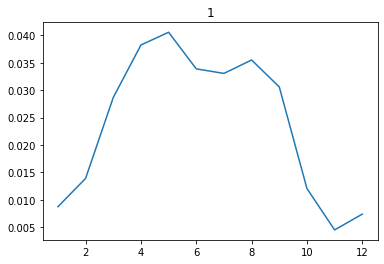

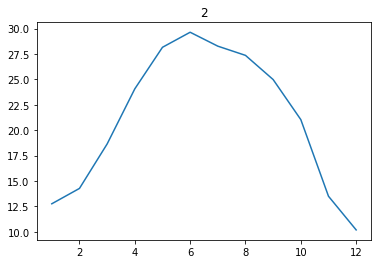

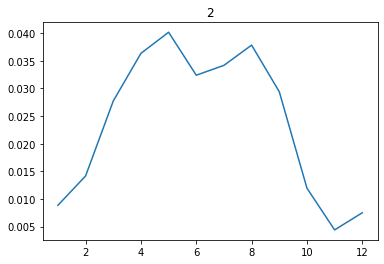

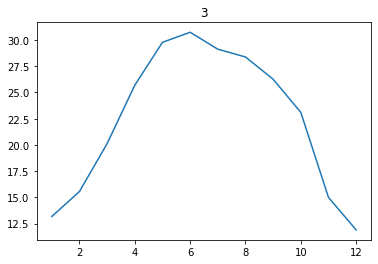

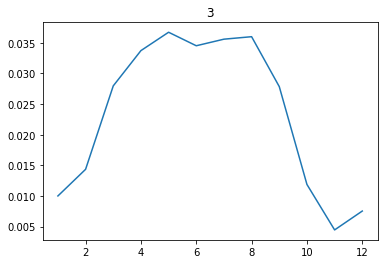

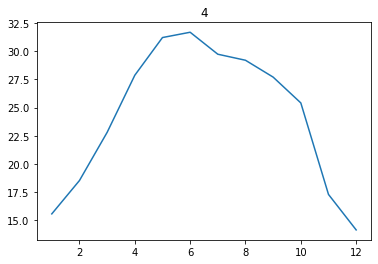

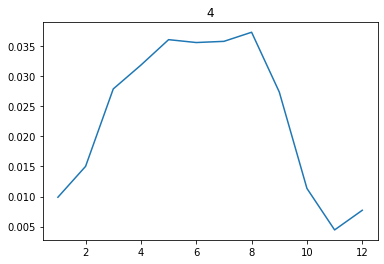

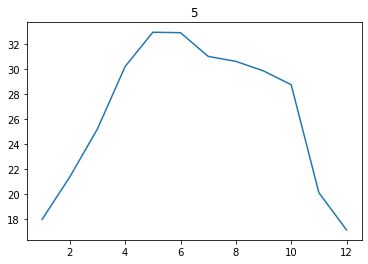

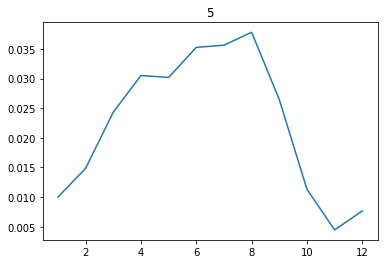

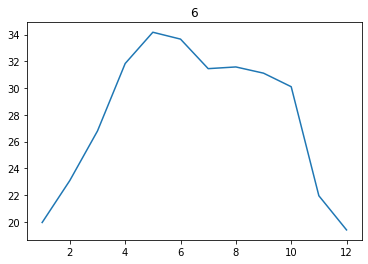

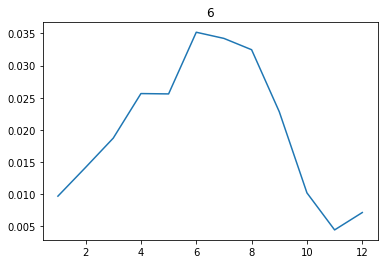

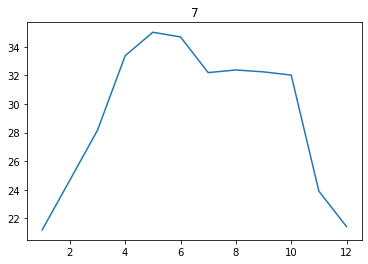

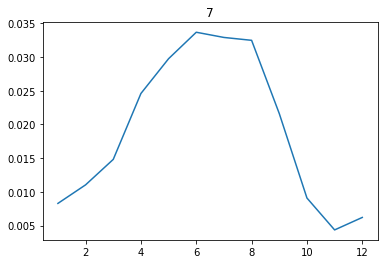

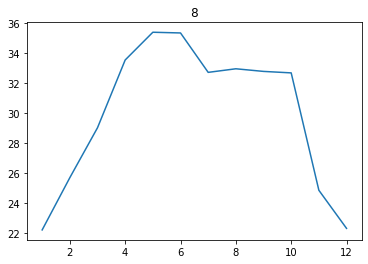

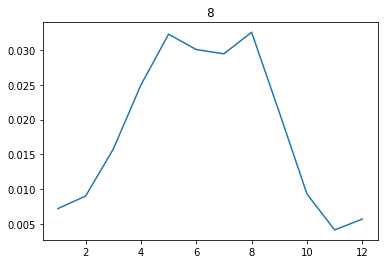

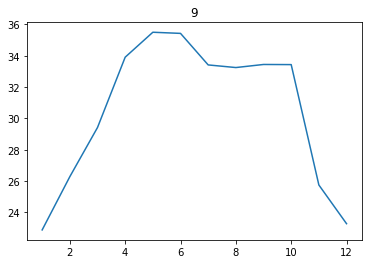

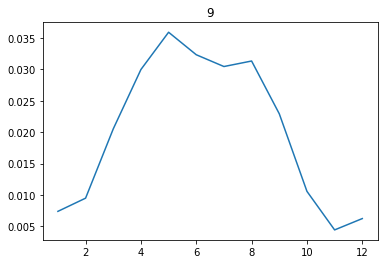

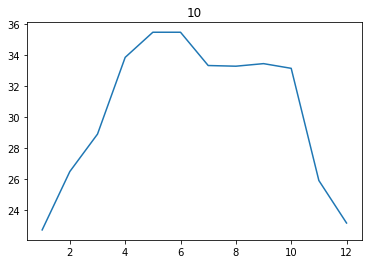

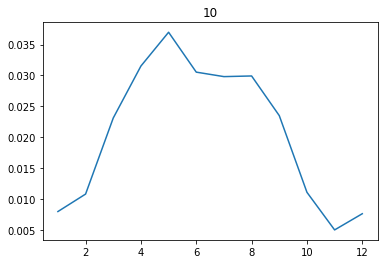

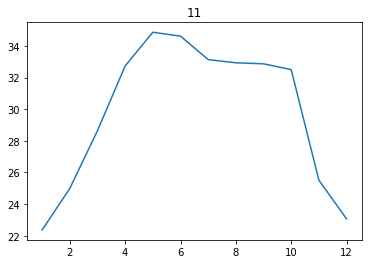

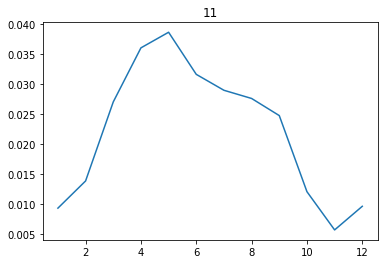

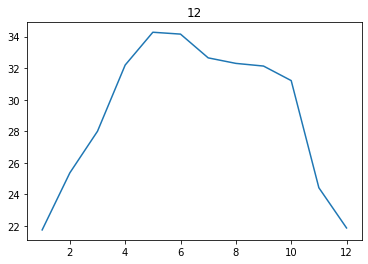

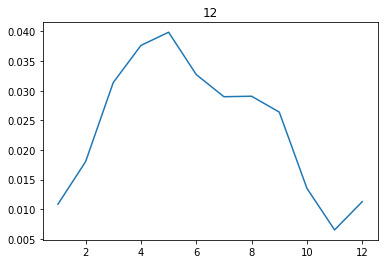

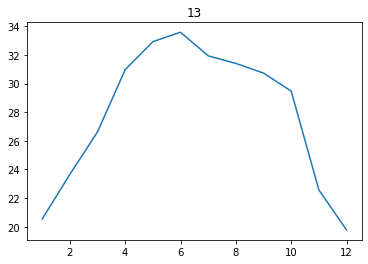

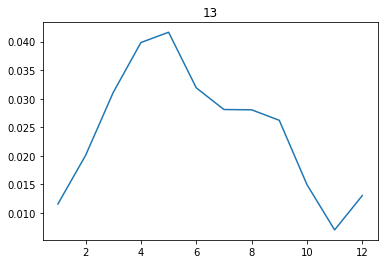

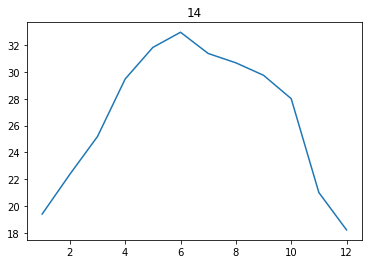

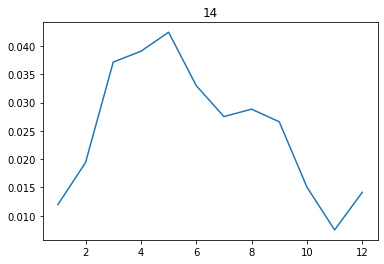

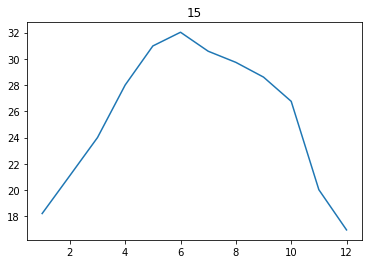

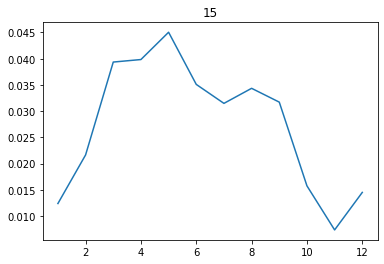

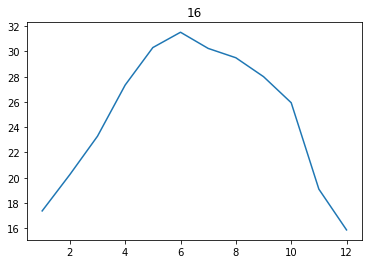

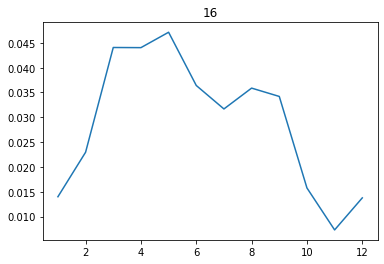

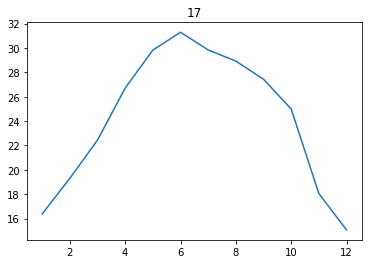

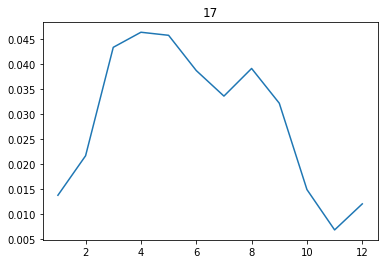

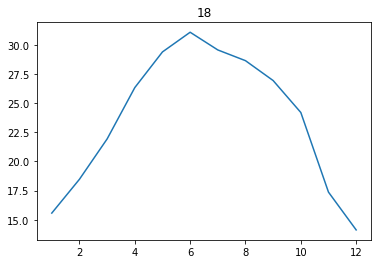

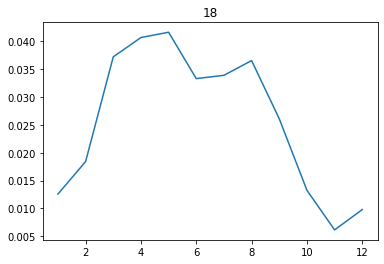

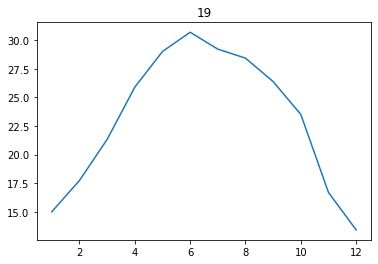

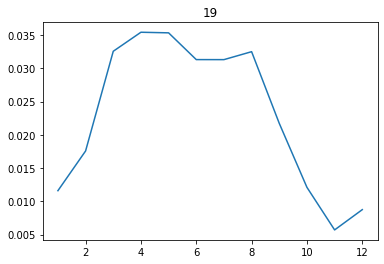

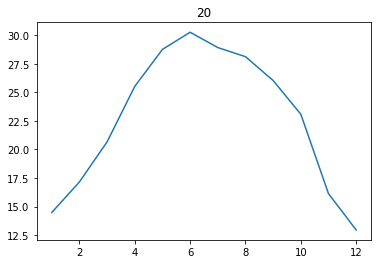

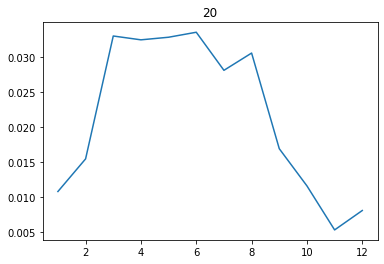

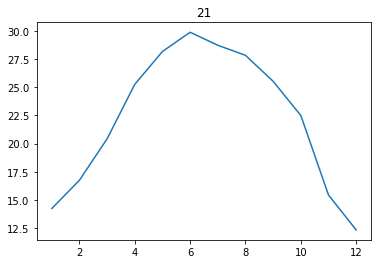

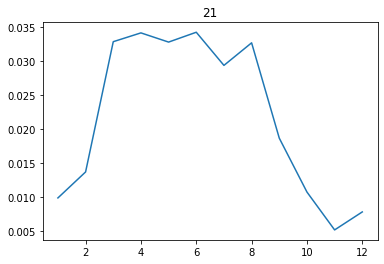

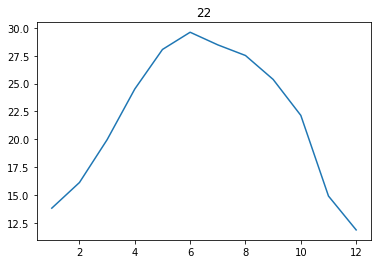

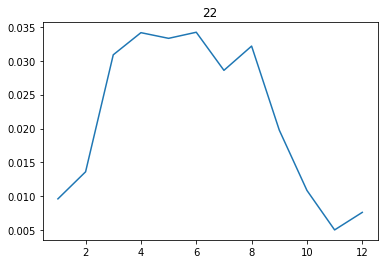

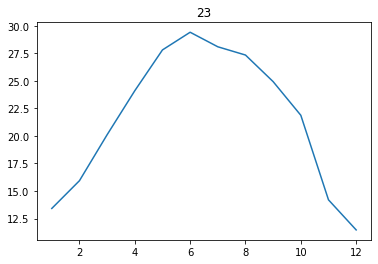

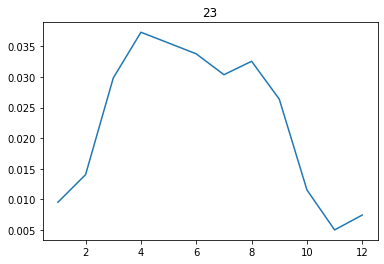

In [12]:
df17 = df[df.year == 2017]

for i in range(24):    
    df17m1 = df17[df17.hour == i]
    plt.plot(df17m1.groupby('month').mean().tmpc, label = i)
    plt.title(i)
    plt.show()
    plt.plot(1/df17m1.groupby('month').mean()['PM2.5'], label = 1)
    plt.title(i)
    plt.show()

In [13]:
df17m = df17[df17.month.isin([10,11,12,1])]
df17mw = df17m[df17m.weekday.isin(range(0,7))]
df17mw[df17mw.hour.isin(range(0,24))].corr('spearman')

,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
PM2.5,1.000000,0.999982,0.496164,-0.376154,0.299727,0.157837,0.158079,0.010622,-0.064116,0.058532,NaN,-0.090236,-0.201537,0.161858,-0.165738,-0.251552,-0.523804
USAQI,0.999982,1.000000,0.496171,-0.376143,0.299662,0.157771,0.158011,0.010673,-0.064123,0.058562,NaN,-0.090246,-0.201571,0.161800,-0.165679,-0.251478,-0.523769
CO2,0.496164,0.496171,1.000000,-0.382864,0.221203,-0.069033,-0.069102,-0.026266,0.034355,0.049512,NaN,0.009788,-0.278851,0.229757,-0.156725,-0.319778,-0.407031
Temperature,-0.376154,-0.376143,-0.382864,1.000000,-0.239766,0.019116,0.017146,-0.020043,0.193632,-0.151961,NaN,-0.118500,0.630298,-0.263244,0.036206,0.108518,0.325610
RelativeHumidity,0.299727,0.299662,0.221203,-0.239766,1.000000,-0.031841,-0.030694,-0.042425,-0.112722,-0.045058,NaN,-0.069429,-0.002582,0.637621,-0.060462,-0.287487,-0.489093
Outdoor PM2.5,0.157837,0.157771,-0.069033,0.019116,-0.031841,1.000000,0.999888,0.053583,-0.050335,-0.094026,NaN,-0.027334,-0.011003,-0.055282,-0.018209,0.093303,0.005236
OutdoorUSAQI,0.158079,0.158011,-0.069102,0.017146,-0.030694,0.999888,1.000000,0.054303,-0.050818,-0.095073,NaN,-0.026975,-0.011976,-0.054748,-0.018040,0.094025,0.005302
weekday,0.010622,0.010673,-0.026266,-0.020043,-0.042425,0.053583,0.054303,1.000000,-0.011022,0.051792,NaN,-0.014741,-0.005500,-0.076118,-0.027740,-0.022593,0.030818
hour,-0.064116,-0.064123,0.034355,0.193632,-0.112722,-0.050335,-0.050818,-0.011022,1.000000,0.001041,NaN,0.000893,-0.069224,0.082070,0.003134,-0.051330,0.141410
month,0.058532,0.058562,0.049512,-0.151961,-0.045058,-0.094026,-0.095073,0.051792,0.001041,1.000000,NaN,-0.014181,-0.173604,-0.024362,-0.009783,-0.154658,-0.121433


/Users/mudasir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0.08679882651680337

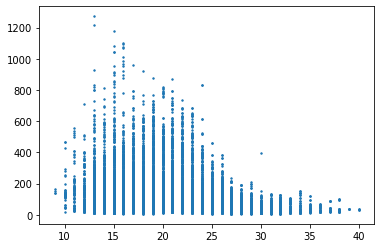

In [14]:
dfnew = df17mw[df17mw.hour.isin(range(0,24))]

dfq = df17mw[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfx = dfq[["PM2.5", "Temperature"]]
dfx.corr("spearman")

dfx.dropna(inplace = True)
from sklearn.linear_model import LinearRegression

X = dfx.drop("PM2.5", axis = 1)
Y = dfx["PM2.5"]

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

from matplotlib import pyplot as plt

plt.scatter(X, Y, s=2)

from sklearn import metrics
metrics.r2_score(Y, Y_pred)

In [17]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([10,11,12,1])]
dfnewday = df17new.groupby(['dayofmonth']).mean()
dfq1 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfq1.to_csv("Oct-Jan17")


#dfx = dfq1[["PM2.5", "sped", "RelativeHumidity", "vsby", "Temperature"]]
X = dfx.drop("PM2.5", axis = 1)
Y = dfx["PM2.5"]
#plt.scatter(X, Y, s=2)
'''
for i in range(1, 32):
    X = dfx[dfx.index == i].drop("PM2.5", axis = 1)
    Y = dfx[dfx.index == i]["PM2.5"]
    display()
    plt.scatter(X, Y, s=2)
    plt.title(i)
    plt.show()
    '''

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

from matplotlib import pyplot as plt



from sklearn import metrics
metrics.r2_score(Y, Y_pred)


0.8339975961981683

In [35]:
df17new = df[df.year == 2017]
#dfnewday = df17new.groupby(['dayofmonth']).mean()
dfq1 = df17new[["month", "dayofmonth", "PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfq1.dropna(inplace = True)
df10 = dfq1[dfq1.month.isin([10,11,12,1])]
df10.drop("month", axis =1, inplace=True)
display(df10.info())
df10.to_csv("Oct-Jan17", index=False)

df2 = dfq1[dfq1.month.isin([2,6])]
df2.drop("month", axis =1, inplace=True)
display(df2.head())
df2.to_csv("Feb-May17", index=False)


df6 = dfq1[dfq1.month.isin([6,10])]
df6.drop("month", axis =1, inplace=True)
display(df6.info())
df6.to_csv("June-Sept17", index=False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15439 entries, 0 to 103013
Data columns (total 8 columns):
dayofmonth          15439 non-null int64
PM2.5               15439 non-null float64
Temperature         15439 non-null float64
CO2                 15439 non-null float64
RelativeHumidity    15439 non-null float64
drct                15439 non-null float64
sped                15439 non-null float64
vsby                15439 non-null float64
dtypes: float64(7), int64(1)
memory usage: 1.1 MB


/Users/mudasir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


None

,dayofmonth,PM2.5,Temperature,CO2,RelativeHumidity,drct,sped,vsby
3009,30,22.0,26.0,439.0,95.0,0.0,0.00,2.49
3010,29,9.0,30.0,408.0,81.0,100.0,13.80,0.62
3014,29,19.0,32.0,416.0,72.0,0.0,0.00,2.49
3015,29,24.0,32.0,410.0,78.0,115.0,19.55,0.56
3018,29,23.0,29.0,413.0,85.0,290.0,25.30,4.35


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 158 to 100331
Data columns (total 8 columns):
dayofmonth          7398 non-null int64
PM2.5               7398 non-null float64
Temperature         7398 non-null float64
CO2                 7398 non-null float64
RelativeHumidity    7398 non-null float64
drct                7398 non-null float64
sped                7398 non-null float64
vsby                7398 non-null float64
dtypes: float64(7), int64(1)
memory usage: 520.2 KB


None

In [16]:
df18 = df[df.year == 2018]
df18m = df18[df18.month.isin(range(2,6))]
df18m[df18m.hour.isin(range(0,6))].corr('pearson')


,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
PM2.5,1.000000,0.985123,0.073491,0.001980,0.009802,-0.007158,-0.013145,-0.004623,0.001830,0.034020,NaN,0.028272,0.048122,-0.060194,-0.023065,-0.012074,-0.059602
USAQI,0.985123,1.000000,0.104904,-0.016155,-0.008423,0.027600,0.037313,-0.001032,-0.001967,0.008470,NaN,0.018836,0.033473,-0.071150,-0.050526,-0.039801,-0.114901
CO2,0.073491,0.104904,1.000000,-0.324809,-0.278315,0.221720,0.279935,0.036766,-0.064886,-0.169950,NaN,-0.003670,-0.270669,-0.048284,-0.238996,-0.225225,-0.111318
Temperature,0.001980,-0.016155,-0.324809,1.000000,-0.040990,-0.167161,-0.226157,-0.016665,-0.110901,0.672187,NaN,0.210353,0.748151,-0.159536,0.258166,0.252779,0.207834
RelativeHumidity,0.009802,-0.008423,-0.278315,-0.040990,1.000000,-0.307504,-0.378277,0.005189,0.071533,-0.056917,NaN,-0.124701,0.137427,0.532653,0.242286,0.163377,-0.160778
Outdoor PM2.5,-0.007158,0.027600,0.221720,-0.167161,-0.307504,1.000000,0.933842,0.018710,0.007106,-0.260162,NaN,-0.028508,-0.295321,-0.098143,-0.324476,-0.219761,-0.239427
OutdoorUSAQI,-0.013145,0.037313,0.279935,-0.226157,-0.378277,0.933842,1.000000,0.007940,0.000175,-0.342432,NaN,-0.073284,-0.354452,-0.122858,-0.401632,-0.273961,-0.287412
weekday,-0.004623,-0.001032,0.036766,-0.016665,0.005189,0.018710,0.007940,1.000000,-0.000423,-0.023045,NaN,-0.031331,-0.018776,0.022869,0.028727,-0.033687,0.011432
hour,0.001830,-0.001967,-0.064886,-0.110901,0.071533,0.007106,0.000175,-0.000423,1.000000,-0.005819,NaN,-0.002007,0.391041,-0.476348,0.058952,0.214965,-0.054411
month,0.034020,0.008470,-0.169950,0.672187,-0.056917,-0.260162,-0.342432,-0.023045,-0.005819,1.000000,NaN,-0.005696,0.723781,-0.228047,0.289335,0.327006,0.360112
